
# Imports, Cleaning and Mundging


In [1]:
import pandas as pd
import dateutil
import numpy as np
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
import statsmodels.api as sm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

/Users/jakerattner/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('C:\\Users\\Jake\\Documents\\ga_home\\project-2\\code/Iowa_Liquor_sales_sample_10pct.csv')

FileNotFoundError: File b'C:\\Users\\Jake\\Documents\\ga_home\\project-2\\code/Iowa_Liquor_sales_sample_10pct.csv' does not exist

In [ ]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [ ]:
df['month'] = pd.DatetimeIndex(df['Date']).month

In [ ]:
# remove the dollar signs and the commas from the curreny
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace(',','')
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('$','')
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace(',','')
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('$','')
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace(',','')
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('$','')
df['State Bottle Cost'] = df['State Bottle Cost'].astype('float')
df['State Bottle Retail'] = df['State Bottle Retail'].astype('float')
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float')

In [ ]:
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float') 

In [409]:
"""
yearly liquor sales per store using. 
add up the transactions for each year, and store sales in 2015 
specifically will be used later as your target variable.
"""

'\nyearly liquor sales per store using. \nadd up the transactions for each year, and store sales in 2015 \nspecifically will be used later as your target variable.\n'

In [410]:
df_2015 = df.loc[df['year'] == 2015]
#df_2015.dtypes

In [411]:
df_2016 = df.loc[df['year'] == 2016]
#df_2016.dtypes

In [412]:
df.groupby(['Store Number','year',])['Sale (Dollars)', ].sum()

Sale (Dollars)
Store Number year                
2106         2015       146326.22
             2016        30523.75
2113         2015         9310.22
             2016         2065.90
2130         2015       111871.43
             2016        27856.11
2152         2015         7721.08
             2016         1376.43
2178         2015        24324.18
             2016         5588.50
2190         2015       121689.06
             2016        34515.69
2191         2015       125093.49
             2016        47338.20
2200         2015        22811.55
             2016         4174.87
2205         2015        24681.39
2228         2015        17462.07
             2016         3086.38
2233         2015        29553.34
             2016         6522.65
2238         2015        11762.56
             2016         4197.66
2248         2015        67682.06
             2016        14524.18
2285         2015        76927.11
             2016        12580.69
2290         2015        56514.43
             2016        12846.93
2327         2015        10245.14
...                           ...
5215         2016         2207.05
5216         2016          159.48
5217         2016          469.62
5218         2016           19.20
5220         2016         1516.17
5222         2016         9948.72
5223         2016          327.18
5224         2016         2595.98
5225         2016          745.65
5226         2016         1746.09
5227         2016         1717.53
5229         2016          510.66
5230         2016         3441.31
5232         2016          186.69
5233         2016          284.85
5234         2016          525.00
5236         2016         4257.62
5237         2016         1341.93
5240         2016          477.60
5247         2016          278.06
9001         2015        28208.52
             2016          708.24
9002         2015        37700.52
             2016         1382.64
9010         2015         5757.96
             2016          177.48
9013         2015         2217.48
             2016          361.56
9018         2015         6435.00
9023         2016          633.36

[2681 rows x 1 columns]

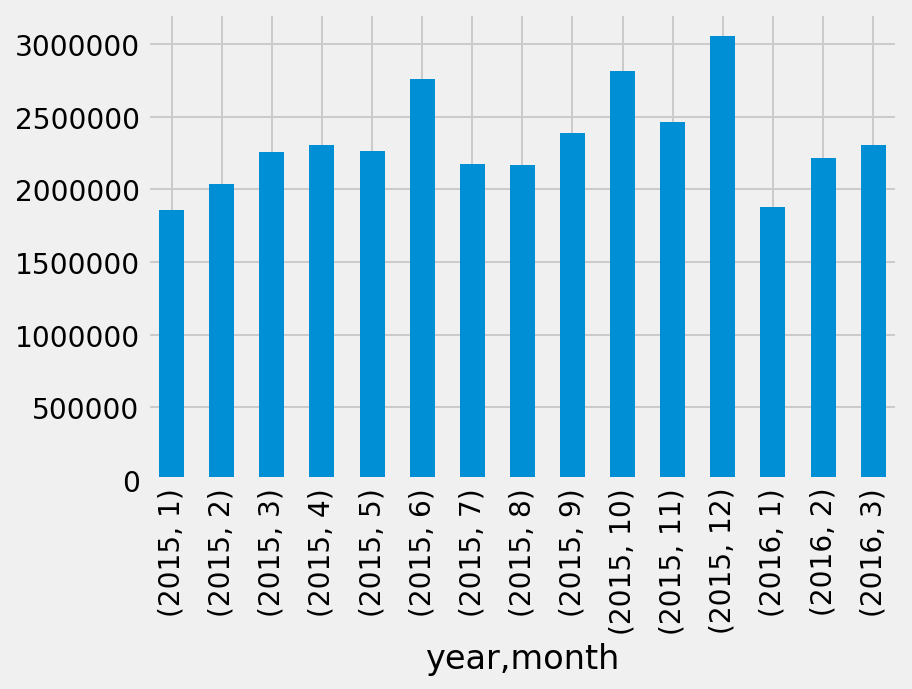

In [413]:
df.groupby(['year','month'])['Sale (Dollars)'].sum().plot(kind='bar') 

In [414]:
df_2015['Sale (Dollars)'].sum()

28527245.39000142

County
Polk             22.442442
Linn              9.136272
Scott             7.165671
Johnson           6.029033
Black Hawk        5.549376
Pottawattamie     3.552279
Woodbury          3.507471
Dubuque           3.116281
Story             3.110131
Cerro Gordo       1.998306
Dallas            1.755814
Dickinson         1.365400
Lee               1.355216
Des Moines        1.351846
Webster           1.265112
Clinton           1.201095
Muscatine         1.024900
Marshall          0.971577
Wapello           0.953387
Carroll           0.943337
Warren            0.873886
Marion            0.689269
Boone             0.650641
Kossuth           0.645704
Hardin            0.625914
Buena Vista       0.609250
Jasper            0.596169
Bremer            0.587132
Sioux             0.552154
Clay              0.510451
                   ...    
Monona            0.188163
Harrison          0.185190
Franklin          0.184990
Cedar             0.184350
Humboldt          0.174408
Adair             0.1

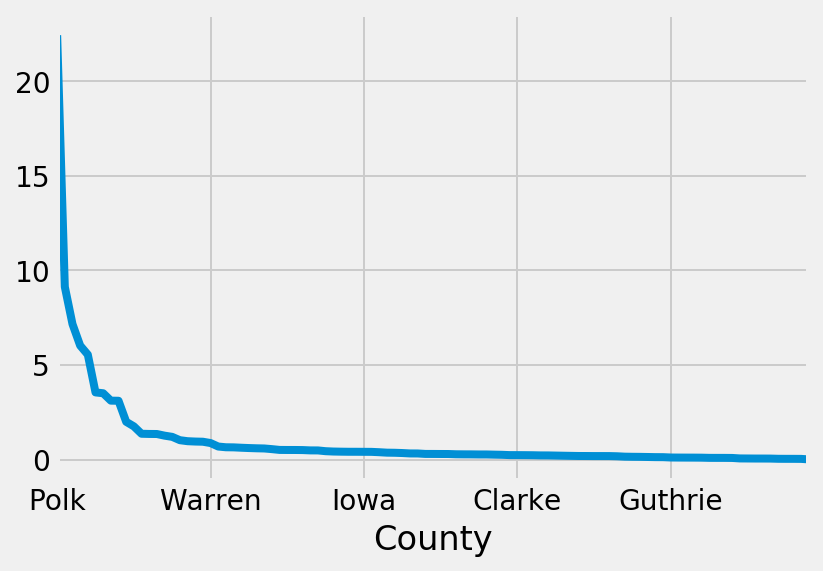

In [415]:
counties = df_2015.groupby(['County'])['Sale (Dollars)'].sum()
counties2 = (counties/ 28527245)*100
counties2.sort_values(ascending=False).plot()
counties2.sort_values(ascending=False)

City
DES MOINES         12.588554
CEDAR RAPIDS        7.270610
DAVENPORT           4.895978
IOWA CITY           3.582239
WATERLOO            3.476458
WEST DES MOINES     3.367127
SIOUX CITY          3.359850
COUNCIL BLUFFS      3.312549
AMES                2.847279
DUBUQUE             2.799448
ANKENY              2.094729
BETTENDORF          1.986349
CEDAR FALLS         1.871389
CORALVILLE          1.853341
WINDSOR HEIGHTS     1.825019
MASON CITY          1.390441
FORT DODGE          1.327344
BURLINGTON          1.060860
CLINTON             1.021843
URBANDALE           1.004651
MARSHALLTOWN        0.941394
MUSCATINE           0.935584
CARROLL             0.865418
MARION              0.860310
KEOKUK              0.859959
ALTOONA             0.844907
SPIRIT LAKE         0.714278
MOUNT VERNON        0.692203
OTTUMWA             0.678274
CLEAR LAKE          0.580799
                     ...    
TREYNOR             0.006153
ALTA                0.006069
WALL LAKE           0.006004
NEW SHARO

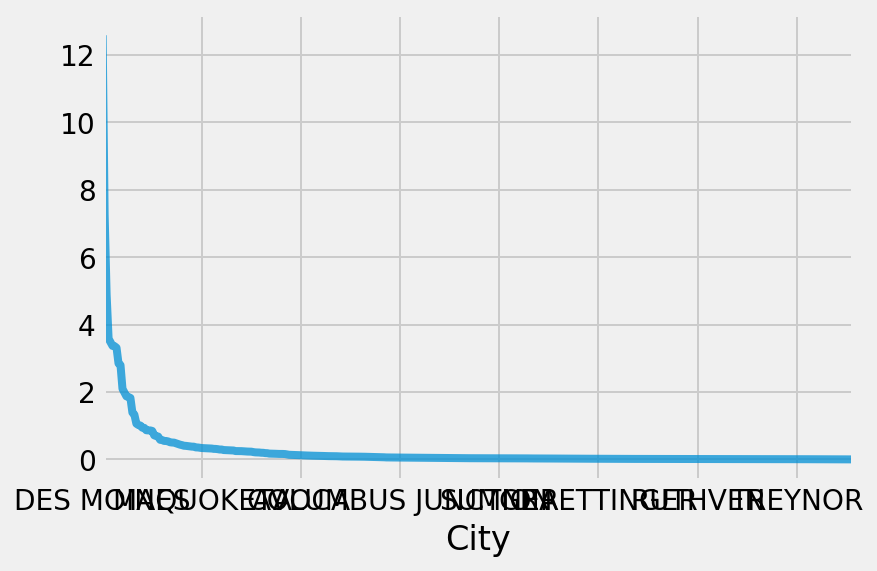

In [416]:
cities = df_2015.groupby(['City'])['Sale (Dollars)'].sum()
cities2 = (cities/ 28527245)*100
plt = cities2.sort_values(ascending=False).plot(alpha=0.75, rot=0)
cities2.sort_values(ascending=False)

# Preparing and Creating Dummy Data from Categories


In [419]:
df = df.Date.str.replace('/', '-')
df['Date'] = pd.to_datetime(df['Date'])
df['Q1'] = df["Date"].isin(pd.date_range("2015-01-01", "2015-03-31"))
df['Q2'] = df["Date"].isin(pd.date_range("2015-04-01", "2015-06-30"))
df['Q3'] = df["Date"].isin(pd.date_range("2015-07-01", "2015-09-30"))
df['Q4'] = df["Date"].isin(pd.date_range("2015-10-01", "2015-12-31"))
df['Q5'] = df["Date"].isin(pd.date_range("2016-01-01", "2016-03-31"))

AttributeError: 'Series' object has no attribute 'Date'

# Linear Model Set Up
Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of all stores. You must use the sales from January to March as one of your variables.

In [360]:
df.columns

Index(['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)', 'year', 'month'],
      dtype='object')

In [361]:
df.drop(['County Number', 'County','Date','Store Number', 'City', 'Zip Code', 'County Number', 
'County','Category', 'Category Name', 'Vendor Number','Item Number','Item Description'], 
        axis=1, inplace=True)

In [362]:
corr = df.corr()
#sns.heatmap(corr, annot=True);

In [363]:
df_2015 = df.loc[df['year'] == 2015]
#df_2015.dtypes

In [364]:
df_2016 = df.loc[df['year'] == 2016]
#df_2016.dtypes

In [365]:
y_train = df_2015['Sale (Dollars)']
x_train = df_2015.drop(['Sale (Dollars)'], axis = 'columns')

In [366]:
# x_train.tail(1)

In [401]:
df_2015['Sale (Dollars)'].sum() #Actual 2016 sales 28527245.39000142

28527245.39000142

In [368]:
from sklearn.preprocessing import StandardScaler

In [369]:
ss = StandardScaler()
xs = ss.fit_transform(x_train)

In [370]:
# x_train.dtypes

In [371]:
lm = linear_model.LinearRegression(fit_intercept=True,
        normalize=False, copy_X=True, n_jobs=1)

In [372]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [373]:
lm.score(x_train,y_train) #this result is R^2, the fraction of variance explained by the model

0.76509577710202525

In [374]:
lm.coef_

array([ -3.82199623e-02,   3.76244560e+01,  -1.88700542e+01,
         5.96765160e+00,   2.25582303e+02,  -8.28168354e+02,
         0.00000000e+00,   3.87636422e-01])

In [375]:
predicted = lm.predict(X=x_train) # creates 'y_hat' ie list of prediction based on model

In [376]:
true = y_train

In [377]:
metrics.r2_score(y_pred = predicted, y_true = true)

0.76509577710202525

In [378]:
y_test = df_2016['Sale (Dollars)']
x_test = df_2016.drop(['Sale (Dollars)'], axis = 'columns')

In [379]:
lm.score(x_test,y_test) #this result is R^2, the fraction of variance explained by the model

0.79135532974247325

In [380]:
predicted = lm.predict(x_test)
df_predict = pd.DataFrame(predicted)

In [381]:
predicted.sum()*4 #25751012.859175131

25751012.859175131

In [384]:
print(predicted)

[  71.09928746  337.91631291   84.33102997 ...,   39.25539848    2.77588009
  -12.77508442]


In [382]:
# PROJECTED CHANGE IN SALES (pretty sure this is wrong)
(predicted.sum()*4) - df_2015['Sale (Dollars)'].sum()

-2776232.5308262892

In [397]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

# Model Fitting
Fit your model(s) using one or both of the regularization tactics covered. Explain whether the regularized or the non-regularized model performed better and what the selected regression(s) are doing.

In [202]:
# try alpha=0.001 and examine coefficients
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(x_train, y_train)
print(lassoreg.coef_)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

[-0.03478079  9.21181305  0.          5.97180846  6.77285417  0.          0.
  0.25819296]


In [203]:
x_train

,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),year,month
0,750,4.50,6.75,12,9.00,2.38,2015,11
4,1750,7.20,10.80,12,21.00,5.55,2015,8
5,1750,13.32,19.98,6,10.50,2.77,2015,4
6,750,6.66,9.99,3,2.25,0.59,2015,8
7,1750,15.75,23.63,2,3.50,0.92,2015,6
9,1000,7.62,11.43,2,2.00,0.53,2015,11
10,750,26.24,39.36,6,4.50,1.19,2015,9
11,1750,6.00,9.25,6,10.50,2.77,2015,10
12,1750,8.92,13.38,1,1.75,0.46,2015,1
15,750,4.50,6.75,4,3.00,0.79,2015,6


In [204]:
# calculate RMSE (for alpha=0.001)
y_pred = lassoreg.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

168.012216759


In [205]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(x_train, y_train)
print(lassoreg.coef_)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

[ -2.04195131e-02   8.31336179e+00   0.00000000e+00   5.99260309e+00
   6.57870904e+00   1.15531820e-03   0.00000000e+00   0.00000000e+00]


In [206]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

168.633170461


In [207]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1)
lassoregcv.fit(x_train, y_train)
lassoregcv.alpha_

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=10, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=1, selection='cyclic', tol=0.0001,
    verbose=False)

0.00069732529888241464

In [208]:
# examine the coefficients
print(lassoregcv.coef_)

[-0.03526181  9.24171829  0.          5.97101924  6.7794123   0.          0.
  0.29759305]


In [209]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

167.998607469


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

Need to clean this up by bringing a lot of the stuff before this section down into this EDA section

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.